## 가상화폐 등락 예측
- 지난 20일간의 upbit 가격데이터
- Bifinex와 비교한 가격 스프레드 데이터
- 두 데이터를 바탕으로 익일의 가상화폐 등락 예측

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import FinanceDataReader as fdr

import os

### 1. 저장된 데이터 불러오기

In [2]:
usd = fdr.DataReader('USD/KRW', '1995-01-01')
df_upbit = pd.read_csv('./upbit_daily.csv', index_col=0)

In [3]:
investing_dir = './investing_data/'
investing_paths = os.listdir(investing_dir)

In [4]:
investing_list = []

for path in investing_paths :
    temp_df = pd.read_csv(investing_dir + path, index_col='Date',  parse_dates=True)
    temp_df['Name'] = path[:-36]
    temp_df.sort_index(inplace=True)
    investing_list.append(temp_df)
    
df_investing = pd.concat(investing_list)

In [5]:
df_upbit

,market,candle_date_time_utc,candle_date_time_kst,opening_price,high_price,low_price,trade_price,timestamp,candle_acc_trade_price,candle_acc_trade_volume,prev_closing_price,change_price,change_rate
0,KRW-ZIL,2020-10-05T00:00:00,2020-10-05T09:00:00,24.9,25.5,23.4,24.0,2020-10-05 23:59:00.601,1.224960e+09,5.061292e+07,24.9,-0.9,-0.036145
1,KRW-ZIL,2020-10-04T00:00:00,2020-10-04T09:00:00,21.8,25.2,21.4,24.9,2020-10-04 23:59:55.713,1.229447e+09,5.322311e+07,21.8,3.1,0.142202
2,KRW-ZIL,2020-10-03T00:00:00,2020-10-03T09:00:00,21.2,23.0,20.4,21.8,2020-10-03 23:58:13.870,7.225800e+08,3.318310e+07,21.2,0.6,0.028302
3,KRW-ZIL,2020-10-02T00:00:00,2020-10-02T09:00:00,22.8,22.9,19.4,21.2,2020-10-02 23:56:59.685,2.149693e+09,1.040192e+08,22.8,-1.6,-0.070175
4,KRW-ZIL,2020-10-01T00:00:00,2020-10-01T09:00:00,22.8,24.1,21.3,22.8,2020-10-01 23:57:06.681,1.313784e+09,5.839854e+07,22.9,-0.1,-0.004367
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,KRW-XTZ,2021-04-28T00:00:00,2021-04-28T09:00:00,6400.0,6580.0,5905.0,6135.0,2021-04-28 23:59:44.590,2.165054e+10,3.478625e+06,6400.0,-265.0,-0.041406
196,KRW-XTZ,2021-04-27T00:00:00,2021-04-27T09:00:00,6200.0,6435.0,6075.0,6400.0,2021-04-27 23:59:59.491,2.548068e+10,4.046449e+06,6205.0,195.0,0.031426
197,KRW-XTZ,2021-04-26T00:00:00,2021-04-26T09:00:00,5450.0,6235.0,5300.0,6205.0,2021-04-27 00:00:00.448,2.613041e+10,4.434185e+06,5445.0,760.0,0.139578
198,KRW-XTZ,2021-04-25T00:00:00,2021-04-25T09:00:00,5410.0,5820.0,5100.0,5445.0,2021-04-25 23:59:56.396,1.783660e+10,3.223416e+06,5410.0,35.0,0.006470


In [6]:
df_investing

,Price,Open,High,Low,Vol.,Change %,Name
Date,,,,,,,
2017-12-31,0.71,0.59,0.74,0.59,17.22M,20.34%,Cardano
2018-01-01,0.7022,0.71,0.715,0.632,17.95M,-1.10%,Cardano
2018-01-02,0.762,0.7022,0.8,0.675,10.97M,8.52%,Cardano
2018-01-03,1.08,0.9782,1.09,0.8882,20.23M,41.73%,Cardano
2018-01-04,1.1043,1.1,1.35,1.05,19.60M,2.25%,Cardano
...,...,...,...,...,...,...,...
2021-11-29,205.5,199.6,209.3,195.4,811.22K,2.96%,Litecoin
2021-11-30,208.1,205.6,218.9,197.5,1.03M,1.27%,Litecoin
2021-12-01,208.8,207.8,217.6,205.6,674.03K,0.34%,Litecoin


### 2. 데이터 전처리

In [5]:
name_list = ['Algorand', 'Axie Infinity', 'Bitcoin Cash', 'Bitcoin', 'Cardano', 'Chainlink', 'Cosmos',\
            'Crypto.com Coin', 'Decentraland', 'Dogecoin', 'Ethereum Classic', 'Ethereum', 'Hedera', 'Litecoin',\
            'Polkadot', 'Polygon', 'Solana', 'Stellar', 'TerraUSD', 'Tezos', 'The Sandbox', 'THETA',\
            'TRON', 'VeChain', 'XRP']
code_list = ['ALGO', 'AXS', 'BTH', 'BTC', 'ADA', 'LINK', 'ATOM', 'CRO', 'MANA', 'DOGE', 'ETC', 'ETH', 'HBAR', 'LTC',\
            'DOT', 'MATIC', 'SOL', 'XLM', 'UST', 'XTZ', 'SAND', 'THETA', 'TRX', 'VET', 'XRP']

code_dict = {
    'Name' : name_list,
    'Code' : code_list
}

In [6]:
df_codes = pd.DataFrame(code_dict)

In [7]:
df_investing.reset_index(inplace=True)
df_investing = pd.merge(df_investing, df_codes, on='Name', how='outer')
df_investing.set_index('Date', inplace=True)

In [8]:
df_upbit['Code'] = df_upbit.market.apply(lambda x : x.split('-')[1])
df_upbit = pd.merge(df_upbit, df_codes, on='Code', how='left')

In [9]:
upbit_columns = ['candle_date_time_utc', 'opening_price', 'high_price', 'low_price', 'trade_price',
       'candle_acc_trade_price', 'Code', 'Name']
df_upbit = df_upbit[upbit_columns]

In [10]:
df_upbit.columns = ['Date', 'Open', 'High', 'Low', 'Price',
       'Volume', 'Code', 'Name']

In [11]:
df_upbit['Date'] = pd.to_datetime(df_upbit.Date)
df_upbit.set_index('Date', inplace=True)

#### 가상화폐별 날짜별로 정렬

In [12]:
sort_list = []
for code in df_upbit.Code.unique():
    temp_df = df_upbit[df_upbit.Code == code].sort_index()
    sort_list.append(temp_df)
    
df_upbit = pd.concat(sort_list)

#### Upbit 데이터와 Bifinex 데이터 합치기

In [13]:
%%time
left_columns = ['Price', 'Volume']
right_columns = ['Price', 'Code', 'Name']
merged_df = []
for name in df_investing.Code.unique():
    
    left = df_upbit[df_upbit.Code == name][left_columns]
    right = df_investing[df_investing.Code == name][right_columns]
    
    temp = pd.merge(left, right, how='inner', suffixes=('_upbit', '_investing'),
            left_index=True, right_index=True)
    
    temp = pd.merge(temp, usd.Close, how='left', left_index=True, right_index=True)
    
    temp.sort_index(inplace=True)
    merged_df.append(temp)

CPU times: user 169 ms, sys: 2.65 ms, total: 171 ms
Wall time: 170 ms


In [14]:
merged_df = pd.concat(merged_df)
merged_df.columns = ['Price_upbit', 'Volume', 'Price_investing', 'Code', 'Name', 'Exchange_rate']
merged_df.ffill(inplace=True)
merged_df['Price_investing'] = merged_df.Price_investing.apply(lambda x : pd.to_numeric(str(x).replace(',', '')))
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 18233 entries, 2017-12-31 to 2021-11-09
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Price_upbit      18233 non-null  float64
 1   Volume           18233 non-null  float64
 2   Price_investing  18233 non-null  float64
 3   Code             18233 non-null  object 
 4   Name             18233 non-null  object 
 5   Exchange_rate    18232 non-null  float64
dtypes: float64(4), object(2)
memory usage: 997.1+ KB


In [15]:
merged_df['Price_inves_won'] = merged_df['Price_investing'] * merged_df['Exchange_rate']
merged_df['KimP']  = merged_df['Price_upbit'] / merged_df['Price_inves_won']
merged_df

,Price_upbit,Volume,Price_investing,Code,Name,Exchange_rate,Price_inves_won,KimP
Date,,,,,,,,
2017-12-31,986.0,8.740969e+11,0.7100,ADA,Cardano,NaN,NaN,NaN
2018-01-01,987.0,5.195622e+11,0.7022,ADA,Cardano,1066.60,748.966520,1.317816
2018-01-02,1050.0,4.955807e+11,0.7620,ADA,Cardano,1063.21,810.166020,1.296031
2018-01-03,1545.0,9.290652e+11,1.0800,ADA,Cardano,1064.80,1149.984000,1.343497
2018-01-04,1755.0,8.579506e+11,1.1043,ADA,Cardano,1062.28,1173.075804,1.496067
...,...,...,...,...,...,...,...,...
2021-11-05,242000.0,1.422169e+10,200.2790,LTC,Litecoin,1181.05,236539.512950,1.023085
2021-11-06,239700.0,9.962796e+09,197.6000,LTC,Litecoin,1181.05,233375.480000,1.027100
2021-11-07,244700.0,8.479420e+09,201.9000,LTC,Litecoin,1181.05,238453.995000,1.026194


## 머신러닝을 통한 상승, 하락 예측

### 기존 일별 변동률을 Categorical하게 변경

In [16]:
def apply_categorical(sr) :
    if -0.01 <= sr < 0.01 :
        return 0
    elif 0.01 <= sr < 0.05 :
        return 1
    elif 0.05 <= sr < 0.10 :
        return 2
    elif 0.10 <= sr < 0.20 :
        return 3
    elif 0.20 <= sr :
        return 4
    elif -0.05 <= sr < -0.01 :
        return 5
    elif -0.10 <= sr < -0.05 :
        return 6
    elif -0.20 <= sr < -0.10 :
        return 7
    elif sr < -0.20 :
        return 8

In [17]:
WINDOWS_SIZE = 20


X = []
kimp = []
y = []


for code in merged_df.Code.unique():
    temp_df = merged_df[merged_df.Code == code][['Price_upbit', 'KimP']]
    temp_df['Price_upbit'] = temp_df['Price_upbit'].pct_change()
    temp_df.dropna(inplace=True)

    for i in range(len(temp_df) - WINDOWS_SIZE) : 
        X.append(temp_df.iloc[[i + j for j in range(WINDOWS_SIZE)]]['Price_upbit'].values)
        kimp.append(temp_df.iloc[[i + j for j in range(WINDOWS_SIZE)]]['KimP'].values)
        if temp_df.iloc[i+WINDOWS_SIZE]['Price_upbit'] > 0 :
            y.append(1)
        else : 
            y.append(0)


X = np.array(X)
y = np.array(y)
kimp = np.array(kimp)

In [18]:
X

array([[ 0.0010142 ,  0.06382979,  0.47142857, ..., -0.00347625,
         0.0127907 ,  0.07462687],
       [ 0.06382979,  0.47142857,  0.13592233, ...,  0.0127907 ,
         0.07462687, -0.16880342],
       [ 0.47142857,  0.13592233, -0.07407407, ...,  0.07462687,
        -0.16880342, -0.06940874],
       ...,
       [ 0.00748404,  0.01005025,  0.0843608 , ..., -0.00813008,
        -0.00819672, -0.00950413],
       [ 0.01005025,  0.0843608 , -0.03650509, ..., -0.00819672,
        -0.00950413,  0.02085941],
       [ 0.0843608 , -0.03650509, -0.03084886, ..., -0.00950413,
         0.02085941,  0.12689007]])

In [19]:
temp_df = pd.DataFrame(X)
for column in temp_df.columns :
    temp_df[column] = temp_df[column].apply(apply_categorical)

In [20]:
temp_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0,2,4,3,6,0,5,6,7,7,6,4,5,7,5,8,2,0,1,2
1,2,4,3,6,0,5,6,7,7,6,4,5,7,5,8,2,0,1,2,7
2,4,3,6,0,5,6,7,7,6,4,5,7,5,8,2,0,1,2,7,6
3,3,6,0,5,6,7,7,6,4,5,7,5,8,2,0,1,2,7,6,6
4,6,0,5,6,7,7,6,4,5,7,5,8,2,0,1,2,7,6,6,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17770,5,0,0,1,2,5,5,1,5,1,1,6,1,1,5,0,1,0,1,0
17771,0,0,1,2,5,5,1,5,1,1,6,1,1,5,0,1,0,1,0,0
17772,0,1,2,5,5,1,5,1,1,6,1,1,5,0,1,0,1,0,0,0
17773,1,2,5,5,1,5,1,1,6,1,1,5,0,1,0,1,0,0,0,1


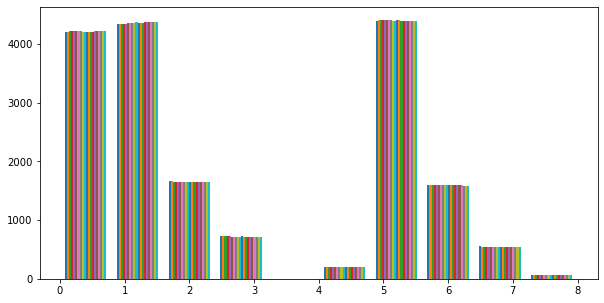

In [21]:
plt.figure(figsize=(10,5))
plt.hist(temp_df)
plt.show()

#### one-hot 인코딩

In [22]:
import tensorflow
X = tensorflow.keras.utils.to_categorical(temp_df)

In [23]:
X.shape, y.shape

((17775, 20, 9), (17775,))

In [24]:
X = X.reshape(X.shape[0], -1)

In [25]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,...,170,171,172,173,174,175,176,177,178,179
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17770,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17771,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17772,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17773,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
pd.DataFrame(kimp)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1.317816,1.296031,1.343497,1.496067,1.537845,1.486211,1.511518,1.569689,1.549011,1.329781,1.377233,1.441608,1.405985,1.320767,1.335521,1.229558,1.295317,1.235724,1.263244,1.243699
1,1.296031,1.343497,1.496067,1.537845,1.486211,1.511518,1.569689,1.549011,1.329781,1.377233,1.441608,1.405985,1.320767,1.335521,1.229558,1.295317,1.235724,1.263244,1.243699,1.181989
2,1.343497,1.496067,1.537845,1.486211,1.511518,1.569689,1.549011,1.329781,1.377233,1.441608,1.405985,1.320767,1.335521,1.229558,1.295317,1.235724,1.263244,1.243699,1.181989,1.192978
3,1.496067,1.537845,1.486211,1.511518,1.569689,1.549011,1.329781,1.377233,1.441608,1.405985,1.320767,1.335521,1.229558,1.295317,1.235724,1.263244,1.243699,1.181989,1.192978,1.124486
4,1.537845,1.486211,1.511518,1.569689,1.549011,1.329781,1.377233,1.441608,1.405985,1.320767,1.335521,1.229558,1.295317,1.235724,1.263244,1.243699,1.181989,1.192978,1.124486,1.112152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17770,1.042195,1.045898,1.040398,1.042128,1.028425,1.042217,1.041072,1.036340,1.039509,1.034805,1.039639,1.047010,1.029336,1.019798,1.015842,1.006233,1.012980,0.997104,1.009854,1.014949
17771,1.045898,1.040398,1.042128,1.028425,1.042217,1.041072,1.036340,1.039509,1.034805,1.039639,1.047010,1.029336,1.019798,1.015842,1.006233,1.012980,0.997104,1.009854,1.014949,1.023085
17772,1.040398,1.042128,1.028425,1.042217,1.041072,1.036340,1.039509,1.034805,1.039639,1.047010,1.029336,1.019798,1.015842,1.006233,1.012980,0.997104,1.009854,1.014949,1.023085,1.027100
17773,1.042128,1.028425,1.042217,1.041072,1.036340,1.039509,1.034805,1.039639,1.047010,1.029336,1.019798,1.015842,1.006233,1.012980,0.997104,1.009854,1.014949,1.023085,1.027100,1.026194


In [27]:
X = pd.concat([pd.DataFrame(X), pd.DataFrame(kimp)], axis=1)

In [28]:
X

,0,1,2,3,4,5,6,7,8,9,...,10,11,12,13,14,15,16,17,18,19
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.377233,1.441608,1.405985,1.320767,1.335521,1.229558,1.295317,1.235724,1.263244,1.243699
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.441608,1.405985,1.320767,1.335521,1.229558,1.295317,1.235724,1.263244,1.243699,1.181989
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.405985,1.320767,1.335521,1.229558,1.295317,1.235724,1.263244,1.243699,1.181989,1.192978
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.320767,1.335521,1.229558,1.295317,1.235724,1.263244,1.243699,1.181989,1.192978,1.124486
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.335521,1.229558,1.295317,1.235724,1.263244,1.243699,1.181989,1.192978,1.124486,1.112152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17770,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.039639,1.047010,1.029336,1.019798,1.015842,1.006233,1.012980,0.997104,1.009854,1.014949
17771,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.047010,1.029336,1.019798,1.015842,1.006233,1.012980,0.997104,1.009854,1.014949,1.023085
17772,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.029336,1.019798,1.015842,1.006233,1.012980,0.997104,1.009854,1.014949,1.023085,1.027100
17773,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.019798,1.015842,1.006233,1.012980,0.997104,1.009854,1.014949,1.023085,1.027100,1.026194


#### 머신러닝 적용

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [30]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((13331, 200), (13331,), (4444, 200), (4444,))

In [31]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [32]:
lr = LogisticRegression(max_iter=1000)
knn = KNeighborsClassifier(n_neighbors=3)
rfc = RandomForestClassifier(n_estimators=1000)
gbr = GradientBoostingClassifier()

lr.fit(X_train, y_train)
knn.fit(X_train, y_train)
rfc.fit(X_train, y_train)
gbr.fit(X_train, y_train)

GradientBoostingClassifier()

In [33]:
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))
print()
print(knn.score(X_train, y_train))
print(knn.score(X_test, y_test))
print()
print(rfc.score(X_train, y_train))
print(rfc.score(X_test, y_test))
print()
print(gbr.score(X_train, y_train))
print(gbr.score(X_test, y_test))

0.572950266296602
0.5238523852385238

0.8257445052884255
0.6262376237623762

1.0
0.7355985598559855

0.6770684869852224
0.6003600360036003


In [41]:
import pickle
pickle.dump(rfc, open('rfc_ud', 'wb'))

### 3. 결과확인

In [34]:
from sklearn.metrics import classification_report

In [35]:
preds = rfc.predict(X_test)

In [36]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.75      0.71      0.73      2262
           1       0.72      0.76      0.74      2182

    accuracy                           0.74      4444
   macro avg       0.74      0.74      0.74      4444
weighted avg       0.74      0.74      0.74      4444



In [37]:
def rjitt(arr):
    stdev = .05*(max(arr)-min(arr))
    return arr + np.random.randn(len(arr)) * stdev

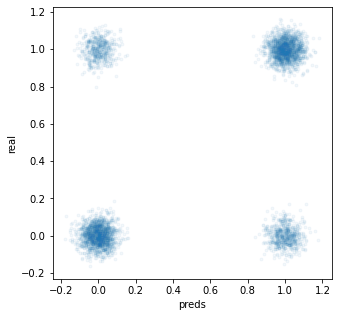

In [38]:
plt.figure(figsize=(5, 5))
plt.scatter(rjitt(preds), rjitt(y_test), s=8, alpha=0.05)
plt.xlabel('preds'),
plt.ylabel('real')
plt.show()